# Confronto modelli 

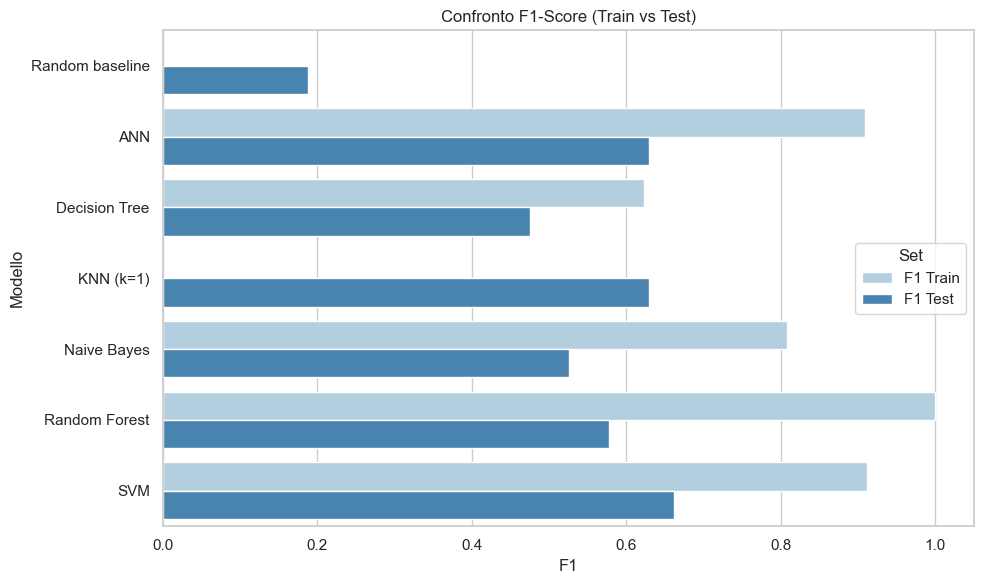

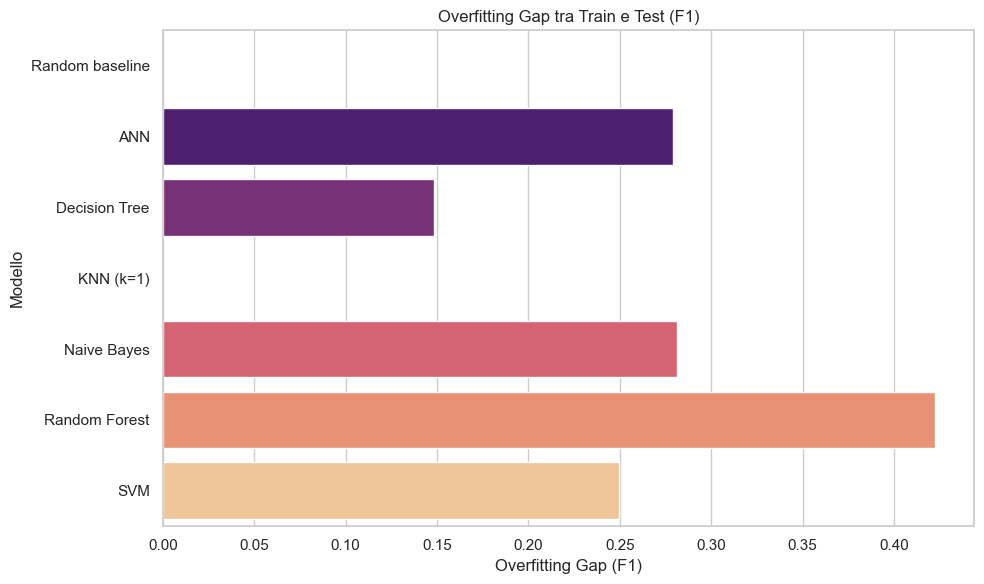

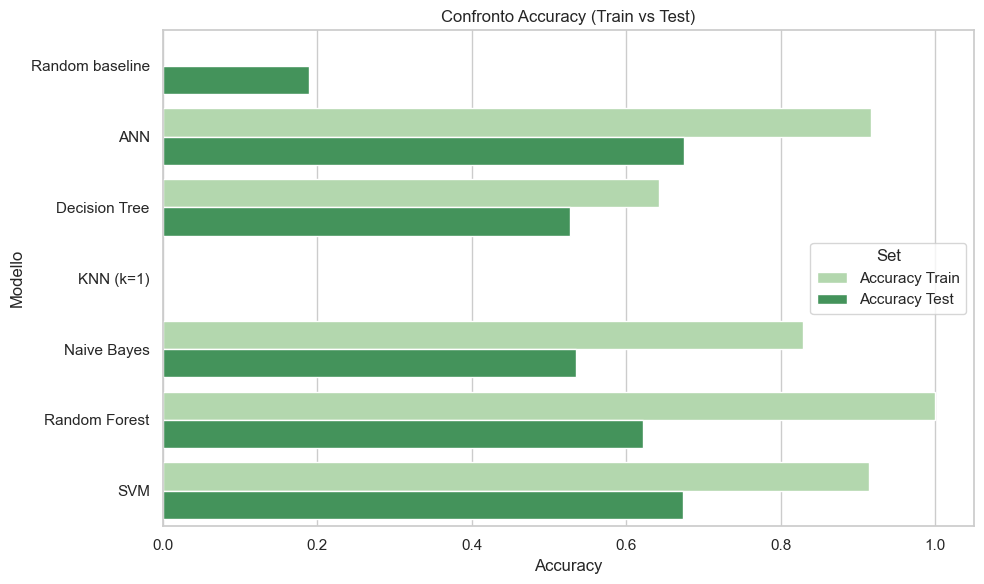

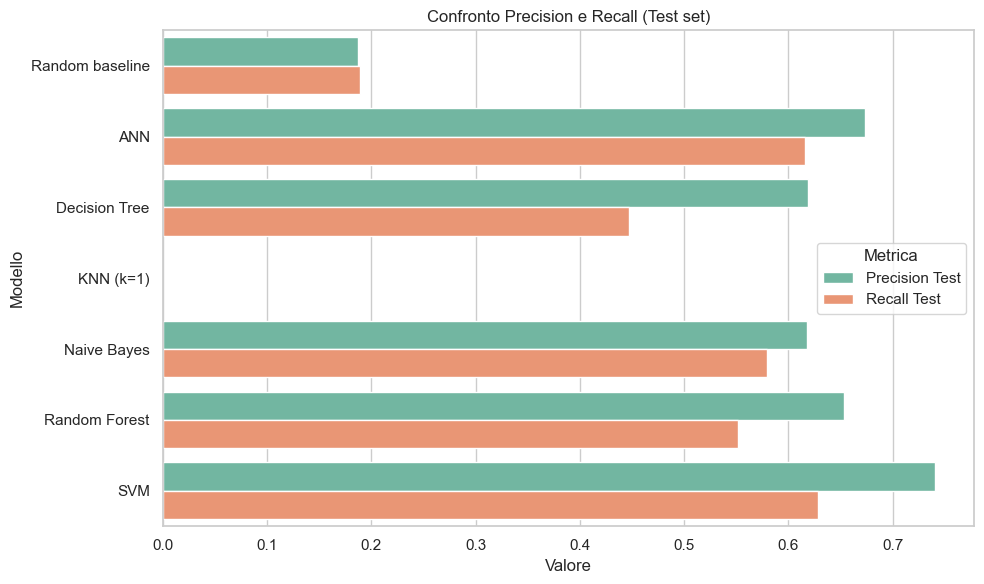

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Crea directory se non esiste
output_dir = "../results/classification_category/confronto"
os.makedirs(output_dir, exist_ok=True)

# Costruzione del DataFrame con tutti i modelli
data = [
    {
        "Modello": "Random baseline",
        "F1 Train": None,
        "F1 Test": 0.1881,
        "Accuracy Train": None,
        "Accuracy Test": 0.1894,
        "Precision Test": 0.1875,
        "Recall Test": 0.1894,
    },
    {
        "Modello": "ANN",
        "F1 Train": 0.9085,
        "F1 Test": 0.6295,
        "Accuracy Train": 0.9172,
        "Accuracy Test": 0.6742,
        "Precision Test": 0.6739,
        "Recall Test": 0.6160,
    },
    {
        "Modello": "Decision Tree",
        "F1 Train": 0.6234,
        "F1 Test": 0.4752,
        "Accuracy Train": 0.6423,
        "Accuracy Test": 0.5265,
        "Precision Test": 0.6188,
        "Recall Test": 0.4467,
    },
    {
        "Modello": "KNN (k=1)",
        "F1 Train": None,
        "F1 Test": 0.6289,
        "Accuracy Train": None,
        "Accuracy Test": None,
        "Precision Test": None,
        "Recall Test": None,
    },
    {
        "Modello": "Naive Bayes",
        "F1 Train": 0.8076,
        "F1 Test": 0.5262,
        "Accuracy Train": 0.8285,
        "Accuracy Test": 0.5354,
        "Precision Test": 0.6183,
        "Recall Test": 0.5793,
    },
    {
        "Modello": "Random Forest",
        "F1 Train": 1.0000,
        "F1 Test": 0.5773,
        "Accuracy Train": 1.0000,
        "Accuracy Test": 0.6212,
        "Precision Test": 0.6538,
        "Recall Test": 0.5514,
    },
    {
        "Modello": "SVM",
        "F1 Train": 0.9114,
        "F1 Test": 0.6619,
        "Accuracy Train": 0.9145,
        "Accuracy Test": 0.6730,
        "Precision Test": 0.7410,
        "Recall Test": 0.6288,
    },
]

df = pd.DataFrame(data)
df["Overfitting Gap (F1)"] = df["F1 Train"] - df["F1 Test"]

# Set stile grafico
sns.set_theme(style="whitegrid")

# F1-Score Train vs Test
plt.figure(figsize=(10, 6))
df_f1 = df.melt(id_vars="Modello", value_vars=["F1 Train", "F1 Test"],
                var_name="Set", value_name="F1")
sns.barplot(data=df_f1, x="F1", y="Modello", hue="Set", palette="Blues")
plt.title("Confronto F1-Score (Train vs Test)")
plt.tight_layout()
plt.savefig(f"{output_dir}/f1_score_confronto.png")

# Overfitting Gap (F1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Overfitting Gap (F1)", y="Modello", hue="Modello", palette="magma", legend=False)
plt.title("Overfitting Gap tra Train e Test (F1)")
plt.tight_layout()
plt.savefig(f"{output_dir}/f1_overfitting_gap.png")

# Accuracy Train vs Test
plt.figure(figsize=(10, 6))
df_acc = df.melt(id_vars="Modello", value_vars=["Accuracy Train", "Accuracy Test"],
                 var_name="Set", value_name="Accuracy")
sns.barplot(data=df_acc, x="Accuracy", y="Modello", hue="Set", palette="Greens")
plt.title("Confronto Accuracy (Train vs Test)")
plt.tight_layout()
plt.savefig(f"{output_dir}/accuracy_confronto.png")

# Precision e Recall Test
plt.figure(figsize=(10, 6))
df_pr = df[["Modello", "Precision Test", "Recall Test"]].melt(id_vars="Modello", var_name="Metrica", value_name="Valore")
sns.barplot(data=df_pr, x="Valore", y="Modello", hue="Metrica", palette="Set2")
plt.title("Confronto Precision e Recall (Test set)")
plt.tight_layout()
plt.savefig(f"{output_dir}/precision_recall_confronto.png")

